# Heart disease
* Heart disease refers to a range of conditions affecting the heart. "Heart disease" and "cardiovascular disease" are is often used instead of each other. According to world health organization, heart disease is leading causes of death in the world. That is to say, heart disease is the world’s biggest killer.
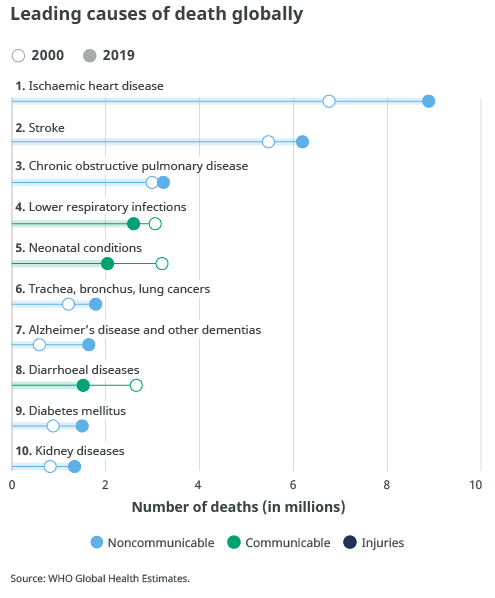


**Types of heart disease**
* There are many different types of heart disease such as Heart rhythm disorders, Atherosclerosis, Cardiomyopathy, Congenital heart defects, Coronary artery disease (CAD), Structural heart disease, and Heart infections. 
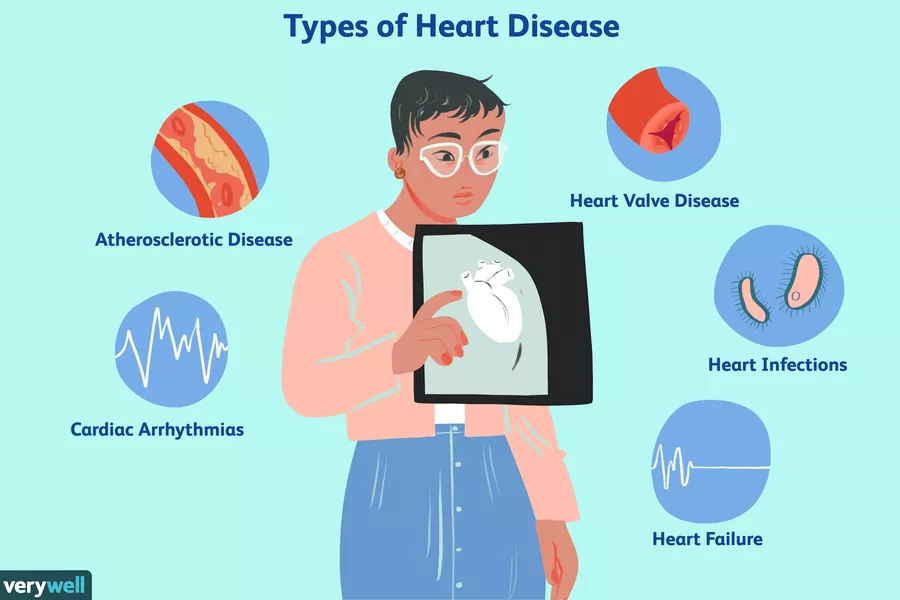
Source: https://www.verywellhealth.com/


**Symptoms of heart disease**
* Some symptoms of heart disease includes: Angina, heart palpitations, nausea, swollen ankles, dizziness, irregular heartbeat, slow pulse, difficulty breathing, fainting spells, fatigue and lightheadedness, swelling due to fluid retention, fluttering heart or racing heartbeat, lightheadedness, leg, arm, jaw, or back pain. 
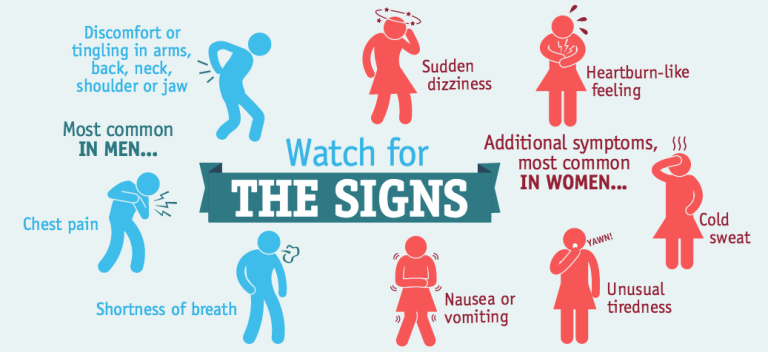
Source:https://myheartsisters.org/

**Objective**
* The main purpose of this study is to raise awareness about how fatal heart disease is. To do this,I try  to create a model to predict if a patient has this disease or not in the dataset. 

# 1. IMPORT SOME NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Load Data

In [ ]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

# 2. UNDERSTANDING THE DATA-SET

****Data Summary****:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

In [ ]:
df.head()

In [ ]:
df.info()

The description of variables in this data as follows:

**Dependent Variable**:

**target**: Heart disease (0 = no, 1 = yes)

**Independent Variable**:
1. **age:** The person's age in years
2. **sex**: The person's sex (1 = male, 0 = female)
3. **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
5. **chol**: The person's cholesterol measurement in mg/dl
6. **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. **thalach**: The person's maximum heart rate achieved
9. **exang**: Exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11. **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. **ca**: The number of major vessels (0-3)
13. **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


In [ ]:
df.isnull().values.any()

There are no missing values in the dataset

In [ ]:
df.shape

In [ ]:
df.describe().T

In [ ]:
# sex: The person's sex (1 = male, 0 = female)

df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

In [ ]:
df["sex"].value_counts()

In [ ]:
df["age_group"] = pd.cut(x=df['age'], bins=[28, 48, 56,62,78], labels=["28-48", "49-56", "57-62","63-78" ])

In [ ]:
df["age_group"].value_counts()

chol: The person's cholesterol measurement in mg/dl
* < 200	Desirable
* 200 to 239	Borderline high
* > 240	High

In [ ]:
df["new_chol"] = pd.cut(x=df['chol'], bins=[0, 200, 239,565], labels=["Desirable", "Borderline high", "High"])

In [ ]:
df["new_chol"].value_counts()

In [ ]:
# Angina is described as  pressure,squeezing, heaviness, tightness or pain in chest.
# exang: Exercise induced angina (1 = yes; 0 = no)
df["exang"].value_counts()

In [ ]:
df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'

In [ ]:
df.exang.value_counts()

In [ ]:
df["cp"].value_counts()

In [ ]:
# cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
df['cp'][df['cp'] == 0] = 'typical angina'
df['cp'][df['cp'] == 1] = 'atypical angina'
df['cp'][df['cp'] == 2] = 'non-anginal pain'
df['cp'][df['cp'] == 3] = 'asymptomatic'

In [ ]:
df["cp"].value_counts()

In [ ]:
# The ST segment/heart rate slope can be a predictor of coronary artery disease
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
df["slope"].value_counts()

In [ ]:
df['slope'][df['slope'] == 0] = 'upsloping'
df['slope'][df['slope'] == 1] = 'flat'
df['slope'][df['slope'] == 2] = 'downsloping'
df["slope"].value_counts()

In [ ]:
# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
df["thal"].value_counts()

In [ ]:
df.info()

In [ ]:
older=df['age']>65
df[older].count().sum()

In [ ]:
df["target"].value_counts()

In [ ]:
# Visualization
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

* There is no high correlation among the features in data set.

# 3. EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(16,16))
fs = ['sex','age_group','cp', 'new_chol','restecg','exang', 'slope', 'ca', 'exang', 'slope']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='target', data=df, palette='prism', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Not Disease", "Disease"])

In [ ]:
df.info()

In [ ]:
more_cat_cols = [col for col in df.columns if len(df[col].unique()) < 10]
print('Number of Categorical Variables : ', len(more_cat_cols))
print(more_cat_cols)

'fbs', 'restecg', 'ca', 'thal', 'target', 'age_group', 'new_chol'

In [ ]:
# changes them ('fbs', 'restecg', 'ca', 'thal', 'age_group', 'new_chol')into categorical variables,
df['fbs'] = df['fbs'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df['age_group'] = df['age_group'].astype('object')
df['new_chol'] = df['new_chol'].astype('object')

In [ ]:
df.info()

In [ ]:
df.drop(['age', 'chol'], axis=1, inplace=True)

# 4. ANALYSIS of NUMERICAL VARIABLE

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variables: ', len(num_cols))
num_cols

****Visualization of numeric variables****

In [ ]:
numeric_cols1= ['trestbps', 'thalach', 'oldpeak']
def hist_for_nums(data, numeric_cols1):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols1:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")
hist_for_nums(df, numeric_cols1)

# 5. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

* Finding the number of values in the target column
* **target**: Heart disease (0 = no, 1 = yes)

In [ ]:
df["target"].value_counts()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df["target"].value_counts(),  labels=['Heart Disease','no Heart Disease'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

* As seen from the values above, there is no imbalance between the classes of the dependent variable.

# 6. ONE-HOT ENCODING

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
cat_cols

In [ ]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df= pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns
df, cat_cols = one_hot_encoder(df, nan_as_category= True)

In [ ]:
df.head()

# 7. MODELING

I split the data set: 80% of the data is train, and 20% of it is test data.

In [ ]:
X = df.drop('target', axis=1)
y = df[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

**Scaling the features**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# LightGBM

**Model**

In [ ]:
lgbm = LGBMClassifier(random_state=46)
lgbm.fit(X_train, y_train)
Lgbm_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, y_train) * 100, 2)
acc_lgbm

# xgboost

**Model**

In [ ]:
xgboost = XGBClassifier(random_state=46)
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)
acc_xgboost = round(xgboost.score(X_train, y_train) * 100, 2)
acc_xgboost

# DecisionTree

**Model**

In [ ]:
DecisionTree = XGBClassifier(random_state=46)
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
acc_DecisionTree = round(DecisionTree.score(X_train, y_train) * 100, 2)
acc_DecisionTree

In [ ]:
models = pd.DataFrame({
    'Model': ["LightGBM",'Decision Tree', "XGBOOST"],
    'Score': [acc_lgbm,acc_DecisionTree, acc_xgboost]})
models.sort_values(by='Score', ascending=False)